## 필요한 라이브러리 Import

In [1]:
import pandas as pd 
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import openpyxl

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score


# 데이터 셋 로드

In [2]:
sumDataFrame = pd.read_csv("20221104_전처리후.csv")#, encoding='cp949')
select_data = sumDataFrame[sumDataFrame.columns[1:]]
select_data = select_data[['categories', 'sub_categories',  'IdMappings-borderfills', 'IdMappings-charshapes',  'IdMappings-cn-fonts', 'IdMappings-en-fonts', 'IdMappings-jp-fonts', 'IdMappings-ko-fonts', 'IdMappings-memoshapes', 'IdMappings-numberings', 'IdMappings-other-fonts', 'IdMappings-parashapes', 'IdMappings-styles', 'IdMappings-symbol-fonts', 'IdMappings-tabdefs', 'IdMappings-user-fonts', 'Style-local-name', 'PageDef-attr', 'PageDef-bookbinding', 'PageDef-bookbinding-offset',  'PageDef-bottom-offset', 'PageDef-footer-offset', 'PageDef-header-offset', 'PageDef-height', 'PageDef-left-offset', 'PageDef-orientation', 'PageDef-right-offset', 'PageDef-top-offset', 'PageDef-width', 'DocumentProperties-endnote-startnum', 'DocumentProperties-footnote-startnum',  'DocumentProperties-math-startnum', 'DocumentProperties-page-startnum', 'DocumentProperties-picture-startnum', 'DocumentProperties-table-startnum', 'FaceName-enname', 'FaceName-koname', 'PageBorderFill-borderfill-id', 'PageBorderFill-fill', 'PageBorderFill-flags', 'PageBorderFill-include-footer', 'PageBorderFill-include-header', 'PageBorderFill-margin-bottom', 'PageBorderFill-margin-left', 'PageBorderFill-margin-right', 'PageBorderFill-margin-top', 'PageBorderFill-relative-to', 'Numbering-align', 'Numbering-auto-indent', 'Numbering-auto-width', 'Numbering-charshape-id', 'Numbering-flags',  'Numbering-numbering-format', 'Numbering-space', 'Numbering-space-type', 'Numbering-starting-number', 'Numbering-width-correction']]
select_data.dtypes

categories                              float64
sub_categories                          float64
IdMappings-borderfills                  float64
IdMappings-charshapes                   float64
IdMappings-cn-fonts                     float64
IdMappings-en-fonts                     float64
IdMappings-jp-fonts                     float64
IdMappings-ko-fonts                     float64
IdMappings-memoshapes                   float64
IdMappings-numberings                   float64
IdMappings-other-fonts                  float64
IdMappings-parashapes                   float64
IdMappings-styles                       float64
IdMappings-symbol-fonts                 float64
IdMappings-tabdefs                      float64
IdMappings-user-fonts                   float64
Style-local-name                        float64
PageDef-attr                            float64
PageDef-bookbinding                     float64
PageDef-bookbinding-offset              float64
PageDef-bottom-offset                   

## 데이터 셋 확인

In [3]:
select_data.fillna(-1)
select_data # 데이터 확인 

,categories,sub_categories,IdMappings-borderfills,IdMappings-charshapes,IdMappings-cn-fonts,IdMappings-en-fonts,IdMappings-jp-fonts,IdMappings-ko-fonts,IdMappings-memoshapes,IdMappings-numberings,...,Numbering-align,Numbering-auto-indent,Numbering-auto-width,Numbering-charshape-id,Numbering-flags,Numbering-numbering-format,Numbering-space,Numbering-space-type,Numbering-starting-number,Numbering-width-correction
0,0.0,-1.0,7.0,31.0,12.0,14.0,12.0,11.0,0.0,0.0,...,-1.0,-2.0,-2.0,-2.0,-1.0,-1.0,-2.0,-1.0,-2.0,-2.0
1,0.0,-1.0,7.0,42.0,12.0,14.0,12.0,11.0,0.0,0.0,...,-1.0,-2.0,-2.0,-2.0,-1.0,-1.0,-2.0,-1.0,-2.0,-2.0
2,0.0,-1.0,7.0,29.0,12.0,14.0,12.0,11.0,0.0,0.0,...,-1.0,-2.0,-2.0,-2.0,-1.0,-1.0,-2.0,-1.0,-2.0,-2.0
3,0.0,-1.0,7.0,26.0,13.0,14.0,13.0,11.0,0.0,0.0,...,-1.0,-2.0,-2.0,-2.0,-1.0,-1.0,-2.0,-1.0,-2.0,-2.0
4,0.0,-1.0,7.0,25.0,12.0,14.0,12.0,11.0,0.0,0.0,...,-1.0,-2.0,-2.0,-2.0,-1.0,-1.0,-2.0,-1.0,-2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,9.0,40.0,34.0,123.0,11.0,14.0,11.0,12.0,0.0,1.0,...,0.0,1.0,0.0,-1.0,3.0,2.0,50.0,0.0,0.0,0.0
9068,9.0,40.0,25.0,59.0,10.0,12.0,10.0,11.0,0.0,1.0,...,0.0,1.0,0.0,-1.0,3.0,2.0,50.0,0.0,0.0,0.0
9069,9.0,40.0,24.0,78.0,16.0,18.0,16.0,17.0,0.0,1.0,...,0.0,1.0,0.0,-1.0,3.0,2.0,50.0,0.0,0.0,0.0
9070,9.0,40.0,21.0,82.0,12.0,14.0,12.0,13.0,0.0,1.0,...,0.0,1.0,0.0,-1.0,3.0,2.0,50.0,0.0,0.0,0.0


1.0    1716
7.0    1282
5.0    1117
9.0    1113
6.0    1024
4.0    1016
3.0    1005
2.0     536
8.0     192
0.0      71
Name: categories, dtype: int64


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


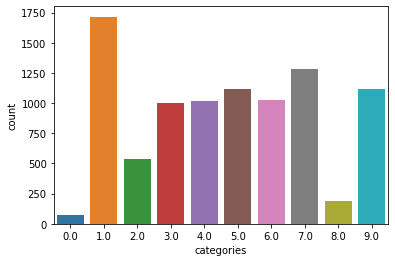

In [4]:
ax = sns.countplot(select_data.categories,label="Count")       # M = 212, B = 357
print(select_data.categories.value_counts())

## 데이터 셋 전체 분포 맞추기 

* 고용노동부(A)
* 국립생태원(B)
* 금융위원회(C)
* 기획재정부(D)
* 산업통상자원부(E) 
* 외교부(F)
* 행정안전부(G) 

9.0    1000
7.0    1000
6.0    1000
5.0    1000
4.0    1000
3.0    1000
1.0    1000
Name: categories, dtype: int64


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


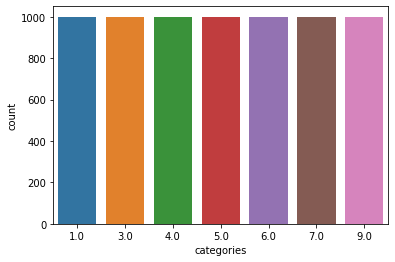

In [5]:
select_data1 = select_data[select_data['categories']==1][:1000]
select_data2 = select_data[select_data['categories']==3][:1000]
select_data3 = select_data[select_data['categories']==4][:1000]
select_data4 = select_data[select_data['categories']==5][:1000]
select_data5 = select_data[select_data['categories']==6][:1000]
select_data6 = select_data[select_data['categories']==7][:1000]
select_data7 = select_data[select_data['categories']==9][:1000]
select_data =  pd.concat([select_data1,select_data2,select_data3,select_data4,select_data5,select_data6,select_data7], ignore_index=True)
ax = sns.countplot(select_data.categories,label="Count")       # M = 212, B = 357
print(select_data.categories.value_counts())

# Test, Train Set 나누기

In [6]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(select_data, select_data['categories'], test_size = 0.3, random_state=1234)
select_VT = VarianceThreshold(0.001)
X_train_VT = select_VT.fit_transform(x_train)
X_test_VT = select_VT.transform(x_test)

### X_train set 확인

5.0    723
6.0    714
1.0    709
7.0    699
3.0    689
9.0    689
4.0    677
Name: categories, dtype: int64


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


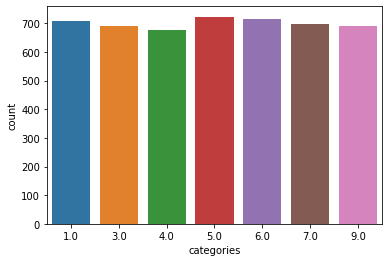

In [7]:
ax = sns.countplot(x_train.categories,label="Count")       
print(x_train.categories.value_counts())

### X_test set 확인

4.0    323
3.0    311
9.0    311
7.0    301
1.0    291
6.0    286
5.0    277
Name: categories, dtype: int64


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


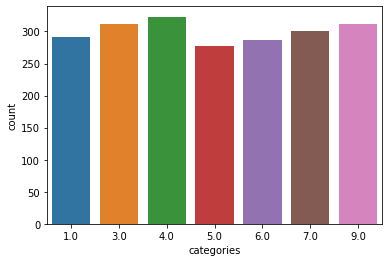

In [8]:
ax = sns.countplot(x_test.categories,label="Count")       
print(x_test.categories.value_counts())

# Feature 

In [9]:
select_all_col = ['IdMappings-borderfills',
       'IdMappings-charshapes', 'IdMappings-cn-fonts', 'IdMappings-en-fonts',
       'IdMappings-jp-fonts', 'IdMappings-ko-fonts', 'IdMappings-memoshapes',
       'IdMappings-numberings', 'IdMappings-other-fonts',
       'IdMappings-parashapes', 'IdMappings-styles', 'IdMappings-symbol-fonts',
       'IdMappings-tabdefs', 'IdMappings-user-fonts', 'Style-local-name',
       'PageDef-attr', 'PageDef-bookbinding', 'PageDef-bookbinding-offset',
       'PageDef-bottom-offset', 'PageDef-footer-offset',
       'PageDef-header-offset', 'PageDef-height', 'PageDef-left-offset',
       'PageDef-orientation', 'PageDef-right-offset', 'PageDef-top-offset',
       'PageDef-width', 'DocumentProperties-endnote-startnum',
       'DocumentProperties-footnote-startnum',
       'DocumentProperties-math-startnum', 'DocumentProperties-page-startnum',
       'DocumentProperties-picture-startnum',
       'DocumentProperties-table-startnum', 'FaceName-enname',
       'FaceName-koname', 'PageBorderFill-borderfill-id',
       'PageBorderFill-fill', 'PageBorderFill-flags',
       'PageBorderFill-include-footer', 'PageBorderFill-include-header',
       'PageBorderFill-margin-bottom', 'PageBorderFill-margin-left',
       'PageBorderFill-margin-right', 'PageBorderFill-margin-top',
       'PageBorderFill-relative-to', 'Numbering-align',
       'Numbering-auto-indent', 'Numbering-auto-width',
       'Numbering-charshape-id', 'Numbering-flags',
       'Numbering-numbering-format', 'Numbering-space', 'Numbering-space-type',
       'Numbering-starting-number', 'Numbering-width-correction']

## Feature 순위

Feature ranking:
1. categories (0.234699)
2. sub_categories (0.147109)
3. PageDef-left-offset (0.067260)
4. PageDef-right-offset (0.065248)
5. PageDef-top-offset (0.050636)
6. PageBorderFill-flags (0.041776)
7. PageDef-bottom-offset (0.033284)
8. IdMappings-styles (0.027999)
9. PageDef-header-offset (0.025982)
10. PageBorderFill-borderfill-id (0.023551)
11. FaceName-enname (0.021619)
12. PageDef-footer-offset (0.018660)
13. IdMappings-ko-fonts (0.017472)
14. IdMappings-other-fonts (0.017184)
15. IdMappings-borderfills (0.016560)
16. FaceName-koname (0.016530)
17. Numbering-auto-width (0.015865)
18. Numbering-flags (0.015712)
19. IdMappings-jp-fonts (0.014689)
20. IdMappings-symbol-fonts (0.014683)
21. Style-local-name (0.014103)
22. IdMappings-parashapes (0.013932)
23. IdMappings-user-fonts (0.012513)
24. IdMappings-charshapes (0.011188)
25. IdMappings-cn-fonts (0.010446)
26. IdMappings-en-fonts (0.010041)
27. IdMappings-tabdefs (0.009029)
28. IdMappings-numberings (0.005118)
29. Numbe

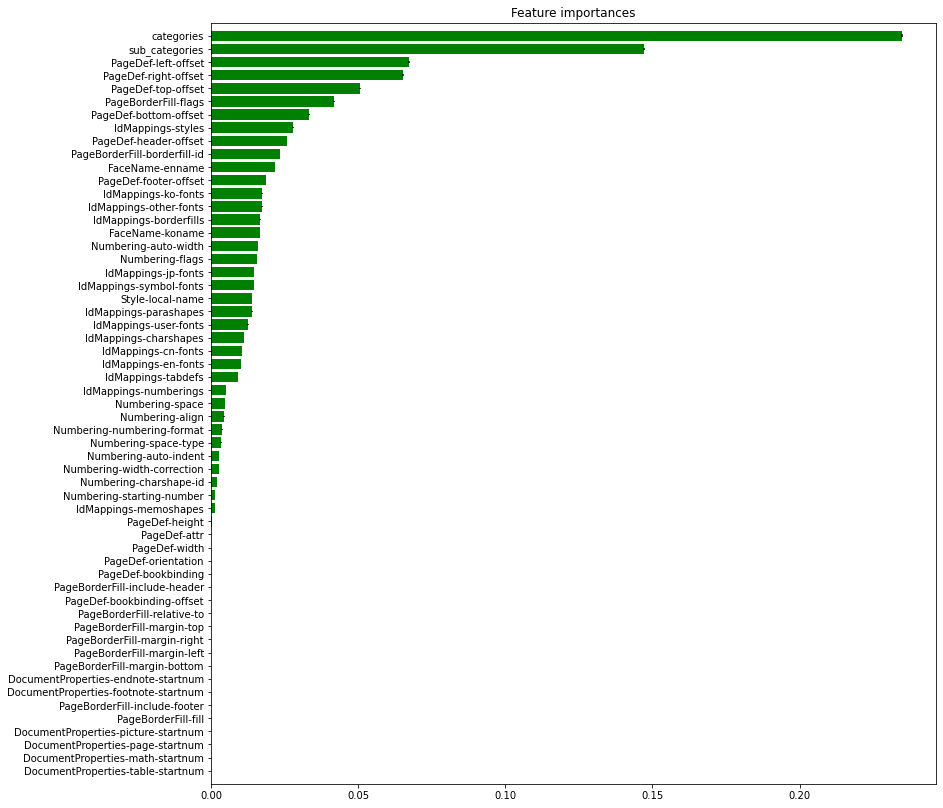

In [10]:
model_5 = RandomForestClassifier(random_state=42, criterion='gini', 
max_features="sqrt", min_samples_leaf=1, min_samples_split=2,  n_estimators=100)    
clr_rf_5 = model_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)
print_indices = np.argsort(-importances)

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1,  x_train.columns[print_indices[f]], importances[print_indices[f]]))

# Plot the feature importances of the forest
plt.figure(1, figsize=(13, 14))
plt.title("Feature importances")
plt.barh( range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.yticks(range(x_train.shape[1]),  x_train.columns[indices])
plt.ylim([-1, x_train.shape[1]])
plt.show()

In [11]:
x_train = x_train[select_all_col]
x_test = x_test[select_all_col]
print("Input Training:",x_train.shape)
print("Input Test:",x_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (4900, 55)
Input Test: (2100, 55)
Output Training: (4900,)
Output Test: (2100,)


In [12]:
x_train

,IdMappings-borderfills,IdMappings-charshapes,IdMappings-cn-fonts,IdMappings-en-fonts,IdMappings-jp-fonts,IdMappings-ko-fonts,IdMappings-memoshapes,IdMappings-numberings,IdMappings-other-fonts,IdMappings-parashapes,...,Numbering-align,Numbering-auto-indent,Numbering-auto-width,Numbering-charshape-id,Numbering-flags,Numbering-numbering-format,Numbering-space,Numbering-space-type,Numbering-starting-number,Numbering-width-correction
6609,10.0,35.0,5.0,8.0,6.0,7.0,0.0,0.0,5.0,19.0,...,-1.0,-2.0,-2.0,-2.0,-1.0,-1.0,-2.0,-1.0,-2.0,-2.0
4761,22.0,55.0,7.0,8.0,7.0,8.0,0.0,1.0,7.0,49.0,...,0.0,1.0,1.0,-1.0,4.0,2.0,50.0,0.0,0.0,0.0
4678,96.0,164.0,15.0,19.0,14.0,14.0,0.0,1.0,11.0,136.0,...,0.0,1.0,1.0,-1.0,4.0,2.0,50.0,0.0,0.0,0.0
4692,17.0,138.0,10.0,12.0,10.0,11.0,0.0,1.0,9.0,59.0,...,0.0,1.0,1.0,-1.0,4.0,2.0,50.0,0.0,0.0,0.0
1339,20.0,83.0,9.0,10.0,9.0,9.0,0.0,1.0,8.0,64.0,...,0.0,1.0,1.0,-1.0,4.0,2.0,50.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,34.0,91.0,15.0,17.0,15.0,16.0,0.0,1.0,13.0,65.0,...,0.0,1.0,1.0,-1.0,4.0,2.0,50.0,0.0,0.0,0.0
3276,41.0,100.0,13.0,17.0,13.0,15.0,0.0,0.0,8.0,72.0,...,-1.0,-2.0,-2.0,-2.0,-1.0,-1.0,-2.0,-1.0,-2.0,-2.0
1318,17.0,74.0,9.0,9.0,9.0,7.0,0.0,1.0,8.0,56.0,...,0.0,1.0,1.0,-1.0,4.0,2.0,50.0,0.0,0.0,0.0
723,21.0,64.0,9.0,9.0,9.0,8.0,0.0,1.0,8.0,58.0,...,0.0,1.0,1.0,-1.0,4.0,2.0,50.0,0.0,0.0,0.0


# Cross validate model with Kfold stratified cross val

In [13]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10)

# Modeling step Test differents algorithms 
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state, criterion='gini', max_features="sqrt", min_samples_leaf=1, min_samples_split=2))
classifiers.append(RandomForestClassifier(random_state=random_state, criterion='gini', max_features="sqrt", min_samples_leaf=1, min_samples_split=2,  n_estimators=100))
classifiers.append(ExtraTreesClassifier(random_state=random_state, criterion='gini', max_features="sqrt", min_samples_leaf=1, min_samples_split=2,  n_estimators=100))
# classifiers.append(AdaBoostClassifier(random_state=random_state,learning_rate=0.1))
# classifiers.append(GradientBoostingClassifier(random_state=random_state))
# classifiers.append(MLPClassifier(random_state=random_state))
# classifiers.append(KNeighborsClassifier())
# classifiers.append(LogisticRegression(random_state = random_state))
# classifiers.append(LinearDiscriminantAnalysis())
# classifiers.append(BernoulliNB())

In [14]:

acc_cv_results = []
precision_cv_results = []
recall_cv_results = []
f1_score_cv_results = []

for classifier in classifiers :
    acc_cv_results.append(cross_val_score(classifier, x_train, y_train, scoring='accuracy' , cv = kfold, n_jobs=-1))
    precision_cv_results.append(cross_val_score(classifier, x_train, y_train, scoring='precision_macro' , cv = kfold, n_jobs=-1))
    recall_cv_results.append(cross_val_score(classifier, x_train, y_train, scoring='recall_macro' , cv = kfold, n_jobs=-1))
    f1_score_cv_results.append(cross_val_score(classifier, x_train, y_train, scoring='f1_macro' , cv = kfold, n_jobs=-1))


## 전체 Feature 를 고려한 정확도

In [15]:

acc_cv_means = []
acc_cv_std = []
for cv_result in acc_cv_results:
    acc_cv_means.append(cv_result.mean())
    acc_cv_std.append(cv_result.std())
acc_cv_res = pd.DataFrame({"CrossValMeans":acc_cv_means,"CrossValerrors": acc_cv_std,"Algorithm":["SVM","DecisionTree","RandomForest","ExtraTrees"]})

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


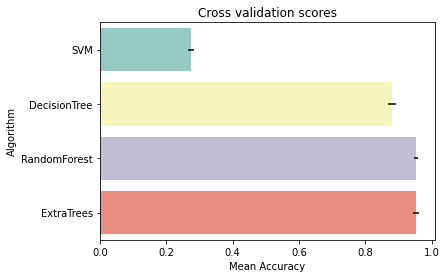

In [16]:
g = sns.barplot("CrossValMeans","Algorithm", data = acc_cv_res, palette="Set3",orient = "h",**{'xerr':acc_cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [17]:
acc_cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.274898,0.008317,SVM
1,0.879184,0.011573,DecisionTree
2,0.951224,0.005805,RandomForest
3,0.951837,0.008523,ExtraTrees


## 전체 Feature를 고려한 precision

In [18]:
precision_cv_means = []
precision_cv_std = []
for cv_result in precision_cv_results:
    precision_cv_means.append(cv_result.mean())
    precision_cv_std.append(cv_result.std())
precision_cv_res = pd.DataFrame({"CrossValMeans":precision_cv_means,"CrossValerrors": precision_cv_std,"Algorithm":["SVM","DecisionTree","RandomForest","ExtraTrees"]})

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


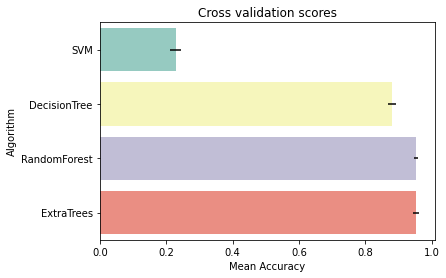

In [19]:
g = sns.barplot("CrossValMeans","Algorithm", data = precision_cv_res, palette="Set3",orient = "h",**{'xerr':precision_cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [20]:
precision_cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.229225,0.016635,SVM
1,0.881453,0.011458,DecisionTree
2,0.952209,0.005624,RandomForest
3,0.952780,0.008237,ExtraTrees


## 전체 Feature를 고려한 Recall

In [21]:
recall_cv_means = []
recall_cv_std = []
for cv_result in recall_cv_results:
    recall_cv_means.append(cv_result.mean())
    recall_cv_std.append(cv_result.std())
recall_cv_res = pd.DataFrame({"CrossValMeans":recall_cv_means,"CrossValerrors": recall_cv_std,"Algorithm":["SVM","DecisionTree","RandomForest","ExtraTrees"]})


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


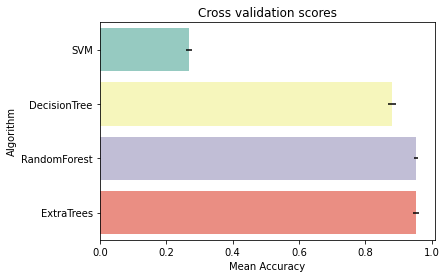

In [22]:
g = sns.barplot("CrossValMeans","Algorithm", data = recall_cv_res, palette="Set3",orient = "h",**{'xerr':recall_cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [23]:
recall_cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.269726,0.008706,SVM
1,0.879224,0.011541,DecisionTree
2,0.951263,0.005813,RandomForest
3,0.951852,0.008641,ExtraTrees


## 전체 Feature를 고려한 f1_score

In [24]:
f1_cv_means = []
f1_cv_std = []
for cv_result in f1_score_cv_results:
    f1_cv_means.append(cv_result.mean())
    f1_cv_std.append(cv_result.std())
f1_cv_res = pd.DataFrame({"CrossValMeans":f1_cv_means,"CrossValerrors": f1_cv_std,"Algorithm":["SVM","DecisionTree","RandomForest","ExtraTrees"]})


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


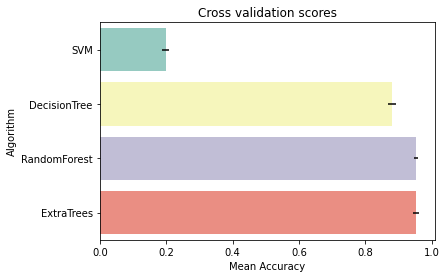

In [25]:
g = sns.barplot("CrossValMeans","Algorithm", data = f1_cv_res, palette="Set3",orient = "h",**{'xerr':f1_cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

# 전체 Feature를 고려하여 개별 알고리즘 적용

## RandomForest  

Accuracy is:  0.9538095238095238
precision_score 0.9536341937143028
recall_score 0.9535128960808541
f1_score 0.9535217702339736
              precision    recall  f1-score   support

           A       0.94      0.97      0.95       291
           B       0.95      0.94      0.94       311
           C       0.95      0.94      0.95       323
           D       0.96      0.95      0.95       277
           E       0.93      0.92      0.92       286
           F       0.97      0.97      0.97       301
           G       0.98      0.99      0.99       311

    accuracy                           0.95      2100
   macro avg       0.95      0.95      0.95      2100
weighted avg       0.95      0.95      0.95      2100



c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'RandomForest')

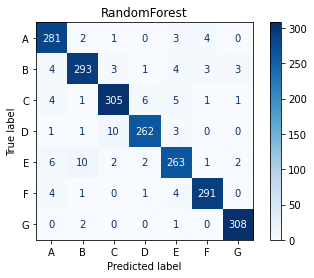

In [26]:
model = RandomForestClassifier(random_state=42, criterion='gini', max_features="sqrt", min_samples_leaf=1, min_samples_split=2,  n_estimators=100)    
clr_rf = model.fit(x_train,y_train)

ac = accuracy_score(y_test,model.predict(x_test))
print('Accuracy is: ',ac)
print("precision_score",precision_score(y_test,model.predict(x_test), average='macro') )
print("recall_score",recall_score(y_test,model.predict(x_test), average='macro')) 
print("f1_score",f1_score(y_test,model.predict(x_test), average='macro')) 
y_label =  ['A','B','C','D','E','F','G']
print(classification_report(y_test, model.predict(x_test), target_names=y_label))

from sklearn.metrics import plot_confusion_matrix
plot = plot_confusion_matrix(model, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             display_labels=y_label, # 표에 표시할 labels
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None

plot.ax_.set_title('RandomForest')

## ExtraTree

Accuracy is:  0.9466666666666667
precision_score 0.9466019149241138
recall_score 0.9463833886502188
f1_score 0.9463868555460545
              precision    recall  f1-score   support

           A       0.93      0.97      0.95       291
           B       0.94      0.94      0.94       311
           C       0.94      0.94      0.94       323
           D       0.97      0.95      0.96       277
           E       0.91      0.89      0.90       286
           F       0.96      0.97      0.97       301
           G       0.97      0.98      0.97       311

    accuracy                           0.95      2100
   macro avg       0.95      0.95      0.95      2100
weighted avg       0.95      0.95      0.95      2100



c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'ExtraTree')

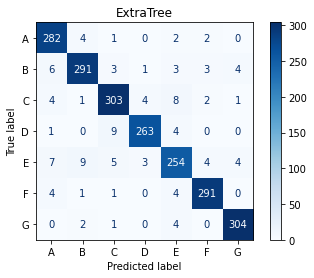

In [27]:
model = ExtraTreesClassifier(random_state=42, criterion='gini', 
max_features="sqrt", min_samples_leaf=1, min_samples_split=2,  n_estimators=100)    
clr_rf = model.fit(x_train,y_train)

ac = accuracy_score(y_test,model.predict(x_test))
print('Accuracy is: ',ac)
print("precision_score",precision_score(y_test,model.predict(x_test), average='macro') )
print("recall_score",recall_score(y_test,model.predict(x_test), average='macro')) 
print("f1_score",f1_score(y_test,model.predict(x_test), average='macro')) 
# cm = confusion_matrix(y_test,model.predict(x_test))
# sns.heatmap(cm,annot=True,fmt="d")

y_label =  ['A','B','C','D','E','F','G']
print(classification_report(y_test, model.predict(x_test), target_names=y_label))

from sklearn.metrics import plot_confusion_matrix
plot = plot_confusion_matrix(model, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             display_labels=y_label, # 표에 표시할 labels
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None

plot.ax_.set_title('ExtraTree')

## DecisionTree

Accuracy is:  0.9114285714285715
precision_score 0.9111224870592327
recall_score 0.9111537715069451
f1_score 0.9111153102423061
              precision    recall  f1-score   support

           A       0.90      0.89      0.89       291
           B       0.89      0.89      0.89       311
           C       0.90      0.90      0.90       323
           D       0.92      0.93      0.92       277
           E       0.87      0.87      0.87       286
           F       0.92      0.94      0.93       301
           G       0.97      0.96      0.97       311

    accuracy                           0.91      2100
   macro avg       0.91      0.91      0.91      2100
weighted avg       0.91      0.91      0.91      2100



c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'DecisionTree')

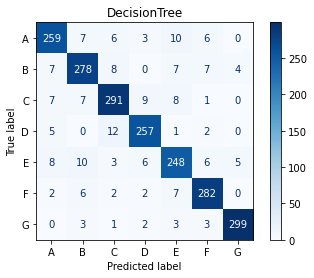

In [28]:
model = DecisionTreeClassifier(random_state=42)    
clr_rf = model.fit(x_train,y_train)

ac = accuracy_score(y_test,model.predict(x_test))
print('Accuracy is: ',ac)
print("precision_score",precision_score(y_test,model.predict(x_test), average='macro') )
print("recall_score",recall_score(y_test,model.predict(x_test), average='macro')) 
print("f1_score",f1_score(y_test,model.predict(x_test), average='macro')) 
# cm = confusion_matrix(y_test,model.predict(x_test))
# sns.heatmap(cm,annot=True,fmt="d")
y_label =  ['A','B','C','D','E','F','G']
print(classification_report(y_test, model.predict(x_test), target_names=y_label))

from sklearn.metrics import plot_confusion_matrix
plot = plot_confusion_matrix(model, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             display_labels=y_label, # 표에 표시할 labels
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None

plot.ax_.set_title('DecisionTree')

## SVM

Accuracy is:  0.2623809523809524


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision_score 0.20472767638721392
recall_score 0.27432357884375946
f1_score 0.19114799902944785


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           A       0.00      0.00      0.00       291
           B       0.76      0.43      0.55       311
           C       0.00      0.00      0.00       323
           D       0.17      1.00      0.29       277
           E       0.50      0.49      0.50       286
           F       0.00      0.00      0.00       301
           G       0.00      0.00      0.00       311

    accuracy                           0.26      2100
   macro avg       0.20      0.27      0.19      2100
weighted avg       0.20      0.26      0.19      2100



Text(0.5, 1.0, 'SVM')

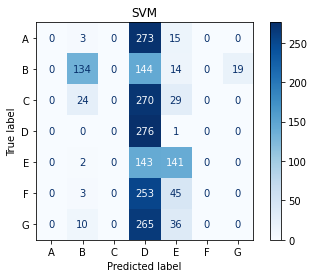

In [29]:
model = SVC(random_state=42)    
clr_rf = model.fit(x_train,y_train)

ac = accuracy_score(y_test,model.predict(x_test))
print('Accuracy is: ',ac)
print("precision_score",precision_score(y_test,model.predict(x_test), average='macro') )
print("recall_score",recall_score(y_test,model.predict(x_test), average='macro')) 
print("f1_score",f1_score(y_test,model.predict(x_test), average='macro')) 
# cm = confusion_matrix(y_test,model.predict(x_test))
# sns.heatmap(cm,annot=True,fmt="d")
y_label =  ['A','B','C','D','E','F','G']
print(classification_report(y_test, model.predict(x_test), target_names=y_label))

from sklearn.metrics import plot_confusion_matrix
plot = plot_confusion_matrix(model, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             display_labels=y_label, # 표에 표시할 labels
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None

plot.ax_.set_title('SVM')

# Feature 중요도 상위 25개의 Feature 에 대하여

In [30]:
select_columns =['PageDef-top-offset', 'PageDef-left-offset', 'PageDef-right-offset', 'PageDef-bottom-offset', 'PageDef-header-offset', 'PageDef-footer-offset',
'PageBorderFill-flags', 'PageBorderFill-borderfill-id', 'FaceName-enname', 'FaceName-koname', 'Style-local-name',
 'IdMappings-styles', 'IdMappings-borderfills', 'IdMappings-user-fonts', 'IdMappings-parashapes', 'IdMappings-symbol-fonts','IdMappings-tabdefs', 'IdMappings-other-fonts', 'IdMappings-charshapes',
'IdMappings-en-fonts', 'IdMappings-jp-fonts', 'IdMappings-ko-fonts','IdMappings-cn-fonts','IdMappings-jp-fonts', 
'Numbering-auto-width', ]
x_train = x_train[select_columns]
x_test = x_test[select_columns]
len(select_columns)

25

In [31]:
x_train

,PageDef-top-offset,PageDef-left-offset,PageDef-right-offset,PageDef-bottom-offset,PageDef-header-offset,PageDef-footer-offset,PageBorderFill-flags,PageBorderFill-borderfill-id,FaceName-enname,FaceName-koname,...,IdMappings-symbol-fonts,IdMappings-tabdefs,IdMappings-other-fonts,IdMappings-charshapes,IdMappings-en-fonts,IdMappings-jp-fonts,IdMappings-ko-fonts,IdMappings-cn-fonts,IdMappings-jp-fonts,Numbering-auto-width
6609,2835.0,5669.0,5669.0,2835.0,3600.0,3600.0,0.0,0.0,-0.181095,-0.348064,...,6.0,1.0,5.0,35.0,8.0,6.0,7.0,5.0,6.0,-2.0
4761,2834.0,5669.0,5669.0,2834.0,2834.0,2834.0,1.0,1.0,-0.635245,-0.617793,...,7.0,2.0,7.0,55.0,8.0,7.0,8.0,7.0,7.0,1.0
4678,2834.0,4988.0,5669.0,2834.0,4251.0,2834.0,1.0,1.0,1.293786,1.307508,...,15.0,7.0,11.0,164.0,19.0,14.0,14.0,15.0,14.0,1.0
4692,4251.0,5102.0,5102.0,2834.0,2834.0,2834.0,1.0,1.0,-0.507492,-0.346608,...,10.0,4.0,9.0,138.0,12.0,10.0,11.0,10.0,10.0,1.0
1339,4251.0,5669.0,5669.0,2834.0,2834.0,2834.0,1.0,1.0,-0.623479,-0.701699,...,9.0,5.0,8.0,83.0,10.0,9.0,9.0,9.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,4251.0,5669.0,5669.0,4251.0,2834.0,2834.0,1.0,1.0,2.013250,-0.119923,...,15.0,3.0,13.0,91.0,17.0,15.0,16.0,15.0,15.0,1.0
3276,3401.0,7086.0,7086.0,3401.0,3401.0,3401.0,1.0,0.0,0.116298,0.004082,...,13.0,7.0,8.0,100.0,17.0,13.0,15.0,13.0,13.0,-2.0
1318,5668.0,5669.0,5669.0,4252.0,4252.0,4252.0,1.0,0.0,0.001254,0.380006,...,9.0,5.0,8.0,74.0,9.0,9.0,7.0,9.0,9.0,1.0
723,3600.0,5669.0,5669.0,3600.0,3600.0,3600.0,1.0,1.0,-0.587904,-0.512702,...,9.0,3.0,8.0,64.0,9.0,9.0,8.0,9.0,9.0,1.0


# Cross validate model with Kfold stratified cross val

In [32]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10)

# Modeling step Test differents algorithms 
random_state = 42
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state, criterion='gini', max_features="sqrt", min_samples_leaf=1, min_samples_split=2))
classifiers.append(RandomForestClassifier(random_state=random_state, criterion='gini', max_features="sqrt", min_samples_leaf=1, min_samples_split=2,  n_estimators=100))
classifiers.append(ExtraTreesClassifier(random_state=random_state, criterion='gini', max_features="sqrt", min_samples_leaf=1, min_samples_split=2,  n_estimators=100))
# classifiers.append(AdaBoostClassifier(random_state=random_state,learning_rate=0.1))
# classifiers.append(GradientBoostingClassifier(random_state=random_state))
# classifiers.append(MLPClassifier(random_state=random_state))
# classifiers.append(KNeighborsClassifier())
# classifiers.append(LogisticRegression(random_state = random_state))
# classifiers.append(LinearDiscriminantAnalysis())
# classifiers.append(BernoulliNB())

In [33]:

acc_cv_results = []
precision_cv_results = []
recall_cv_results = []
f1_score_cv_results = []

for classifier in classifiers :
    acc_cv_results.append(cross_val_score(classifier, x_train, y_train, scoring='accuracy' , cv = kfold, n_jobs=-1))
    precision_cv_results.append(cross_val_score(classifier, x_train, y_train, scoring='precision_macro' , cv = kfold, n_jobs=-1))
    recall_cv_results.append(cross_val_score(classifier, x_train, y_train, scoring='recall_macro' , cv = kfold, n_jobs=-1))
    f1_score_cv_results.append(cross_val_score(classifier, x_train, y_train, scoring='f1_macro' , cv = kfold, n_jobs=-1))


## 중요도 상위 25개의 Feature 를 고려한 정확도

In [34]:

acc_cv_means = []
acc_cv_std = []
for cv_result in acc_cv_results:
    acc_cv_means.append(cv_result.mean())
    acc_cv_std.append(cv_result.std())
acc_cv_res = pd.DataFrame({"CrossValMeans":acc_cv_means,"CrossValerrors": acc_cv_std,"Algorithm":["SVM","DecisionTree","RandomForest","ExtraTrees"]})

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


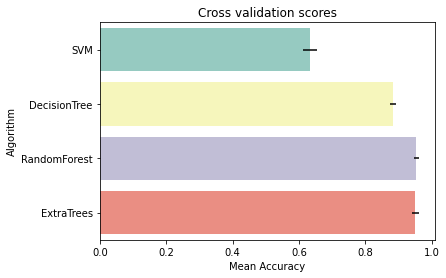

In [35]:
g = sns.barplot("CrossValMeans","Algorithm", data = acc_cv_res, palette="Set3",orient = "h",**{'xerr':acc_cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [36]:
acc_cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.634286,0.021027,SVM
1,0.883469,0.008632,DecisionTree
2,0.952449,0.007529,RandomForest
3,0.950000,0.010376,ExtraTrees


## 중요도 상위 25개의 Feature를 고려한 precision

In [37]:
precision_cv_means = []
precision_cv_std = []
for cv_result in precision_cv_results:
    precision_cv_means.append(cv_result.mean())
    precision_cv_std.append(cv_result.std())
precision_cv_res = pd.DataFrame({"CrossValMeans":precision_cv_means,"CrossValerrors": precision_cv_std,"Algorithm":["SVM","DecisionTree","RandomForest","ExtraTrees"]})

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


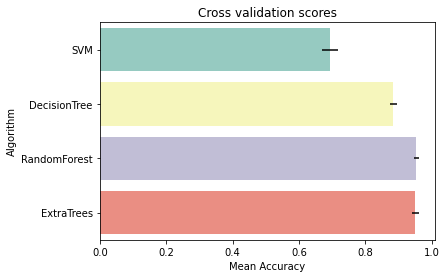

In [38]:
g = sns.barplot("CrossValMeans","Algorithm", data = precision_cv_res, palette="Set3",orient = "h",**{'xerr':precision_cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [39]:
precision_cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.693100,0.023627,SVM
1,0.884964,0.009459,DecisionTree
2,0.953566,0.007235,RandomForest
3,0.950972,0.010178,ExtraTrees


## 중요도 상위 25개의 Recall

In [40]:
recall_cv_means = []
recall_cv_std = []
for cv_result in recall_cv_results:
    recall_cv_means.append(cv_result.mean())
    recall_cv_std.append(cv_result.std())
recall_cv_res = pd.DataFrame({"CrossValMeans":recall_cv_means,"CrossValerrors": recall_cv_std,"Algorithm":["SVM","DecisionTree","RandomForest","ExtraTrees"]})


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


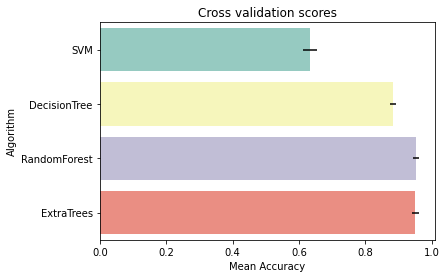

In [41]:
g = sns.barplot("CrossValMeans","Algorithm", data = recall_cv_res, palette="Set3",orient = "h",**{'xerr':recall_cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [42]:
recall_cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.633282,0.021361,SVM
1,0.883431,0.008580,DecisionTree
2,0.952419,0.007597,RandomForest
3,0.950055,0.010467,ExtraTrees


## 중요도 상위 25개의 f1_score

In [43]:
f1_cv_means = []
f1_cv_std = []
for cv_result in f1_score_cv_results:
    f1_cv_means.append(cv_result.mean())
    f1_cv_std.append(cv_result.std())
f1_cv_res = pd.DataFrame({"CrossValMeans":f1_cv_means,"CrossValerrors": f1_cv_std,"Algorithm":["SVM","DecisionTree","RandomForest","ExtraTrees"]})


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


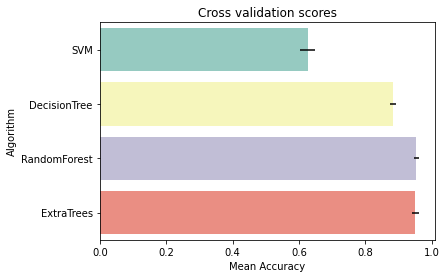

In [44]:
g = sns.barplot("CrossValMeans","Algorithm", data = f1_cv_res, palette="Set3",orient = "h",**{'xerr':f1_cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [45]:
f1_cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.626131,0.023107,SVM
1,0.883539,0.008930,DecisionTree
2,0.952640,0.007525,RandomForest
3,0.950146,0.010443,ExtraTrees


# 개별 알고리즘 적용

## RandomForest 

Accuracy is:  0.9514285714285714
precision_score 0.9512514105609451
recall_score 0.951226464450364
f1_score 0.9512109764889478
              precision    recall  f1-score   support

           A       0.94      0.96      0.95       291
           B       0.93      0.94      0.94       311
           C       0.95      0.94      0.95       323
           D       0.96      0.95      0.95       277
           E       0.92      0.92      0.92       286
           F       0.97      0.97      0.97       301
           G       0.99      0.98      0.98       311

    accuracy                           0.95      2100
   macro avg       0.95      0.95      0.95      2100
weighted avg       0.95      0.95      0.95      2100



c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'RandomForest')

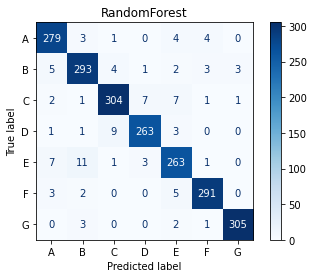

In [46]:
model = RandomForestClassifier(random_state=42, criterion='gini', max_features="sqrt", min_samples_leaf=1, min_samples_split=2,  n_estimators=100)    
clr_rf = model.fit(x_train,y_train)

ac = accuracy_score(y_test,model.predict(x_test))
print('Accuracy is: ',ac)
print("precision_score",precision_score(y_test,model.predict(x_test), average='macro') )
print("recall_score",recall_score(y_test,model.predict(x_test), average='macro')) 
print("f1_score",f1_score(y_test,model.predict(x_test), average='macro')) 
y_label =  ['A','B','C','D','E','F','G']
print(classification_report(y_test, model.predict(x_test), target_names=y_label))

from sklearn.metrics import plot_confusion_matrix
plot = plot_confusion_matrix(model, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             display_labels=y_label, # 표에 표시할 labels
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None

plot.ax_.set_title('RandomForest')

## ExtraTree

Accuracy is:  0.9471428571428572
precision_score 0.946900982996677
recall_score 0.946756900853189
f1_score 0.9467739183264533
              precision    recall  f1-score   support

           A       0.94      0.96      0.95       291
           B       0.95      0.94      0.94       311
           C       0.94      0.94      0.94       323
           D       0.97      0.95      0.96       277
           E       0.90      0.89      0.89       286
           F       0.95      0.96      0.96       301
           G       0.97      0.99      0.98       311

    accuracy                           0.95      2100
   macro avg       0.95      0.95      0.95      2100
weighted avg       0.95      0.95      0.95      2100



c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'ExtraTree')

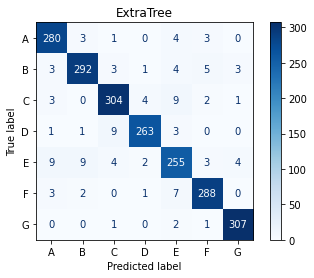

In [47]:
model = ExtraTreesClassifier(random_state=42, criterion='gini', 
max_features="sqrt", min_samples_leaf=1, min_samples_split=2,  n_estimators=100)    
clr_rf = model.fit(x_train,y_train)

ac = accuracy_score(y_test,model.predict(x_test))
print('Accuracy is: ',ac)
print("precision_score",precision_score(y_test,model.predict(x_test), average='macro') )
print("recall_score",recall_score(y_test,model.predict(x_test), average='macro')) 
print("f1_score",f1_score(y_test,model.predict(x_test), average='macro')) 
# cm = confusion_matrix(y_test,model.predict(x_test))
# sns.heatmap(cm,annot=True,fmt="d")

y_label =  ['A','B','C','D','E','F','G']
print(classification_report(y_test, model.predict(x_test), target_names=y_label))

from sklearn.metrics import plot_confusion_matrix
plot = plot_confusion_matrix(model, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             display_labels=y_label, # 표에 표시할 labels
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None

plot.ax_.set_title('ExtraTree')

## DecisionTree

Accuracy is:  0.9047619047619048
precision_score 0.9046134787818054
recall_score 0.904401397763321
f1_score 0.9044724910316101
              precision    recall  f1-score   support

           A       0.89      0.90      0.90       291
           B       0.88      0.87      0.88       311
           C       0.89      0.91      0.90       323
           D       0.92      0.92      0.92       277
           E       0.85      0.85      0.85       286
           F       0.94      0.92      0.93       301
           G       0.96      0.96      0.96       311

    accuracy                           0.90      2100
   macro avg       0.90      0.90      0.90      2100
weighted avg       0.90      0.90      0.90      2100



c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'DecisionTree')

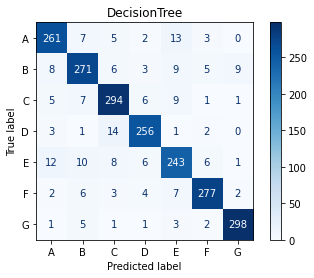

In [48]:
model = DecisionTreeClassifier(random_state=42)    
clr_rf = model.fit(x_train,y_train)

ac = accuracy_score(y_test,model.predict(x_test))
print('Accuracy is: ',ac)
print("precision_score",precision_score(y_test,model.predict(x_test), average='macro') )
print("recall_score",recall_score(y_test,model.predict(x_test), average='macro')) 
print("f1_score",f1_score(y_test,model.predict(x_test), average='macro')) 
# cm = confusion_matrix(y_test,model.predict(x_test))
# sns.heatmap(cm,annot=True,fmt="d")
y_label =  ['A','B','C','D','E','F','G']
print(classification_report(y_test, model.predict(x_test), target_names=y_label))

from sklearn.metrics import plot_confusion_matrix
plot = plot_confusion_matrix(model, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             display_labels=y_label, # 표에 표시할 labels
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None

plot.ax_.set_title('DecisionTree')

## SVM

Accuracy is:  0.638095238095238
precision_score 0.6873337211603356
recall_score 0.6397475593056684
f1_score 0.6314910859541818
              precision    recall  f1-score   support

           A       0.60      0.48      0.53       291
           B       0.75      0.73      0.74       311
           C       0.87      0.43      0.58       323
           D       0.83      0.88      0.86       277
           E       0.76      0.37      0.50       286
           F       0.50      0.90      0.64       301
           G       0.50      0.69      0.58       311

    accuracy                           0.64      2100
   macro avg       0.69      0.64      0.63      2100
weighted avg       0.69      0.64      0.63      2100



c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'SVM')

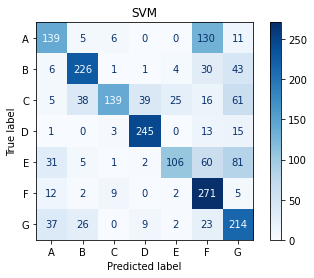

In [49]:
model = SVC(random_state=42)    
clr_rf = model.fit(x_train,y_train)

ac = accuracy_score(y_test,model.predict(x_test))
print('Accuracy is: ',ac)
print("precision_score",precision_score(y_test,model.predict(x_test), average='macro') )
print("recall_score",recall_score(y_test,model.predict(x_test), average='macro')) 
print("f1_score",f1_score(y_test,model.predict(x_test), average='macro')) 
# cm = confusion_matrix(y_test,model.predict(x_test))
# sns.heatmap(cm,annot=True,fmt="d")
y_label =  ['A','B','C','D','E','F','G']
print(classification_report(y_test, model.predict(x_test), target_names=y_label))

from sklearn.metrics import plot_confusion_matrix
plot = plot_confusion_matrix(model, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             display_labels=y_label, # 표에 표시할 labels
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None

plot.ax_.set_title('SVM')